## Session10 - playground

### Whole training from the beginning / 初めからのトレーニング

Let's first run the whole network training process from the start.

まずは、最初からネットワークトレーニングを行います。

<div style="background-color: #FFDDBB; padding: 10px;">
<b>REMINDER</b>: If you are getting strange errors when executing code with neural networks, make sure that you stopped or restarted the kernels in all other notebooks!
    
<b>注意</b>：ニューラルネットワークのコードを実行しているときに見知らぬエラーが発生した場合は、他のすべてのノートブックでカーネルを停止または再起動したかを確認してください！
</div>


#### Imports

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

# Import Tensorflow 
import tensorflow as tf

# Import Keras stuff
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout, LSTM
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.utils import to_categorical

#### Load MNIST and create the training and testing sets

In [2]:
from mnist_loader import MNISTVectorLoader
mnist_vector_loader = MNISTVectorLoader(43)
X, y = mnist_vector_loader.samples(70000)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size=0.5)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

#### Define the network
<a id='define_the_network'></a>

In [3]:
input_shape = X_train[0].shape
vector_input = Input(shape = input_shape, name='input')

fc1 = Dense(128, activation='relu', name='fc1')(vector_input)

fc2 = Dense(128, activation='relu', name='fc2')(fc1)

output = Dense(10, activation='softmax', name='output')(fc2)

network = Model(vector_input, output, name='classification')

network.summary()

network.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.01), metrics=['acc'])

Model: "classification"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           [(None, 784)]             0         
_________________________________________________________________
fc1 (Dense)                  (None, 128)               100480    
_________________________________________________________________
fc2 (Dense)                  (None, 128)               16512     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


2022-05-01 23:18:38.480109: I tensorflow/core/platform/cpu_feature_guard.cc:145] This TensorFlow binary is optimized with Intel(R) MKL-DNN to use the following CPU instructions in performance critical operations:  SSE4.1 SSE4.2
To enable them in non-MKL-DNN operations, rebuild TensorFlow with the appropriate compiler flags.
2022-05-01 23:18:38.480738: I tensorflow/core/common_runtime/process_util.cc:115] Creating new thread pool with default inter op setting: 8. Tune using inter_op_parallelism_threads for best performance.


#### Train the network

In [4]:
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

In [5]:
H = network.fit(X_train, y_train_one_hot,
                batch_size=100, epochs=20,
                validation_data=(X_test, y_test_one_hot),
                verbose=1)

Train on 35000 samples, validate on 35000 samples
Epoch 1/20
35000/35000 [==============================] - 5s 149us/sample - loss: 0.3435 - acc: 0.9044 - val_loss: 0.2959 - val_acc: 0.9183
Epoch 2/20
35000/35000 [==============================] - 4s 126us/sample - loss: 0.2362 - acc: 0.9366 - val_loss: 0.2741 - val_acc: 0.9285
Epoch 3/20
35000/35000 [==============================] - 4s 126us/sample - loss: 0.2213 - acc: 0.9426 - val_loss: 0.2667 - val_acc: 0.9373
Epoch 4/20
35000/35000 [==============================] - 4s 126us/sample - loss: 0.2088 - acc: 0.9459 - val_loss: 0.2341 - val_acc: 0.9459
Epoch 5/20
35000/35000 [==============================] - 4s 123us/sample - loss: 0.1852 - acc: 0.9514 - val_loss: 0.3015 - val_acc: 0.9415
Epoch 6/20
35000/35000 [==============================] - 5s 135us/sample - loss: 0.1685 - acc: 0.9576 - val_loss: 0.2698 - val_acc: 0.9481
Epoch 7/20
35000/35000 [==============================] - 5s 133us/sample - loss: 0.1423 - acc: 0.9631 - val_l

## TASK 1
Plot the evolution of the losses and accuracies.

損失と精度の進化をプロットしてください。

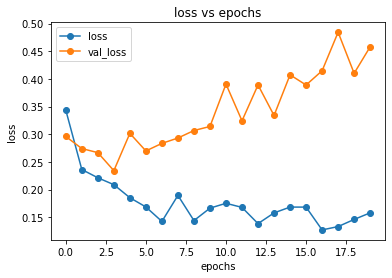

In [6]:
## YOUR CODE HERE
#loss
plt.plot(H.history['loss'], 'o-',label="loss")
plt.plot(H.history['val_loss'], 'o-', label="val_loss")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.title("loss vs epochs")
plt.legend();

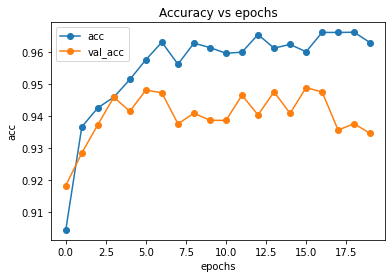

In [7]:
#acc
plt.plot(H.history['acc'], 'o-', label="acc")
plt.plot(H.history['val_acc'], 'o-', label="val_acc")
plt.xlabel("epochs")
plt.ylabel("acc")
plt.title("Accuracy vs epochs")
plt.legend();

## TASK 2
Re-run the training but this time:
- Stop the training when `val_acc` the accuracy on the validation set does not grow anymore 
- Save the model with the best accuracy as `my_best_network.hdf5`

トレーニングを再実行してください。今回は
 - テストセットの精度（`val_acc`）が向上しなくなったら、トレーニングを中断する
 - モデルを `my_best_network.hdf5`として最高の精度で保存します

Note that you have to recreate the network to re-initialize the weights if you want to re-train from scratch.
<br>
Otherwise the training just updates the current weights.
<br>So, you have to re-run the cells from the "Define the network" section above to create a new model with fresh weights.

注：最初からトレーニングをやり直す場合は、重みを再初期化する必要があります（そうしなければ、トレーニングは現在の重みを更新するだけです）。そのためネットワークを再作成しなければなりません。
<br>
以上の「Define the network」章からのセルを再実行して、新しい重みを持つ新しいモデルを作成してください。

Plot again the evolution of the losses and accuracies.

もう一度損失と精度の進化をプロットしてください。

In [9]:
## YOUR CODE HERE
early_stopping_cb = EarlyStopping(monitor='val_loss', min_delta=0.001, patience=2, verbose=1, mode='auto')
model_checkpoint_cb = ModelCheckpoint("best_network.hdf5", monitor='val_loss', verbose=1, 
                                      save_best_only=True, save_weights_only=False, mode='auto', period=1)

H = network.fit(X_train, y_train_one_hot, batch_size=100, epochs=20, validation_data=(X_test, y_test_one_hot),
                callbacks=[early_stopping_cb, model_checkpoint_cb], verbose=1)

network.load_weights('best_network.hdf5')

from tensorflow.keras.models import load_model
best_network = load_model('best_network.hdf5')

Train on 35000 samples, validate on 35000 samples
Epoch 1/20
34400/35000 [============================>.] - ETA: 0s - loss: 0.1493 - acc: 0.9629
Epoch 00001: val_loss improved from inf to 0.49671, saving model to best_network.hdf5
35000/35000 [==============================] - 6s 159us/sample - loss: 0.1490 - acc: 0.9629 - val_loss: 0.4967 - val_acc: 0.9370
Epoch 2/20
34700/35000 [============================>.] - ETA: 0s - loss: 0.1435 - acc: 0.9658
Epoch 00002: val_loss improved from 0.49671 to 0.47354, saving model to best_network.hdf5
35000/35000 [==============================] - 6s 160us/sample - loss: 0.1434 - acc: 0.9657 - val_loss: 0.4735 - val_acc: 0.9445
Epoch 3/20
34700/35000 [============================>.] - ETA: 0s - loss: 0.1156 - acc: 0.9701
Epoch 00003: val_loss did not improve from 0.47354
35000/35000 [==============================] - 5s 156us/sample - loss: 0.1157 - acc: 0.9701 - val_loss: 0.6909 - val_acc: 0.9300
Epoch 4/20
34700/35000 [===========================

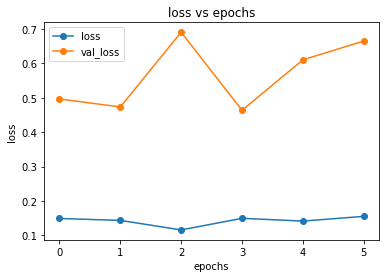

In [10]:
#loss
plt.plot(H.history['loss'], 'o-',label="loss")
plt.plot(H.history['val_loss'], 'o-', label="val_loss")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.title("loss vs epochs")
plt.legend();

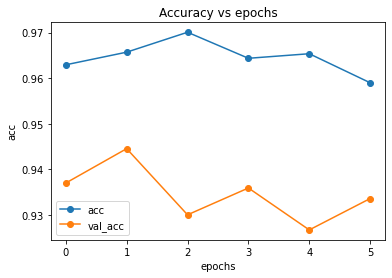

In [11]:
#acc
plt.plot(H.history['acc'], 'o-', label="acc")
plt.plot(H.history['val_acc'], 'o-', label="val_acc")
plt.xlabel("epochs")
plt.ylabel("acc")
plt.title("Accuracy vs epochs")
plt.legend();

## TASK 3 - Recognize your own writting / 自分の手書き数字の認識

In the tests above the testing data was also from MNIST.
<br>
Let us now try to recognize some handwritten digits that are not from MNIST.

今までは、トレーニングにもテストにもMNISTのデータを使っていました。
<br>
今度は自分が書いた手書きの数字を認識してみましょう。

First load the network you want to test.

まず試してみたいネットワークをロードします。

In [12]:
network = load_model("my_network.hdf5")

Then, use the next cell  to draw a digit to test the classifier:
- Draw in the middle of the dark area
- The prediction is updated at each stroke
- Use the clear button to erase

Try the classification multiple times to empirically check the accuracy of the classifier.

次に、次のセルを使って数字を描いて分類器をテストしてください。
 - 暗い領域の真ん中に描いて
 - 予測は各ストロークで更新されます
 - 消去するにはクリアボタンを使用してください

分類器の精度を経験的に確認するために、分類を複数回試してください。

In [13]:
from digit_classifier_widget import digit_classifier_widget
    
def run_classifier(X):
    y_pred_one_hot = network.predict(X)
    y_prediction = np.argmax(y_pred_one_hot)
    return y_prediction
    
digit_classifier_widget(run_classifier, scaler)

How does it compare to the SVM classifier from last week?
<br>
Write your impressions in the cell below. 

先週のSVM分類器と比べてどうでしょうか？
<br>
感想を下のセルに書いてください。

#### WRITE ANSWER HERE



精度は上がっていそう  
5や7を正しく予測できている  